# Techniques for Stock price prediction: A comparison study

## Done By
### Ronak Sankaranarayanan
### Sitanshu Rupani

**Recommended Readings:** 
* [Quantopian Tutorials](https://www.quantopian.com/tutorials/) 
* [Quantopian online notebook system](https://www.quantopian.com/notebooks/).

We will explore the comparison between some Regression Techniques and Time Series Forecasting in predictions of the closing price of the Apple stock.
The stock market has been a fixture in a country’s economy forever now. We judge the economic performance of the country based on indices of the country’s biggest stock market exchange.
People have been trying to predict stock performance of companies using statistics and mathematics for decades to get an edge in the market. These methods all have varying degrees of efficacy.
We will compare some methods of doing the same.


The problem we are trying to solve is to predict a company’s(Apple in our case) performance based on the stock market based on prior history. With the advent of smartphone technology, investing has become very easy and accessible to everyone. Take the example of Robinhood. 
Robinhood is a financial services company that provides a mobile app and website that offer people the ability to invest in stocks, ETFs, and options through Robinhood Financial and crypto trading through Robinhood Crypto. Its ease of use and features has lead to an exponential rise in its popularity and usage(See image).

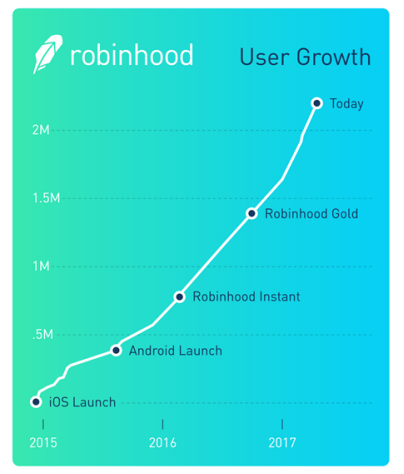

We believe this is an important problem to solve as it can help apps like Robinhood get an edge over competitors in provide that insight and analysis to its users along with predictions of how their portfolio will perform over a period of time.

# Data Collection/Processing: 

In [5]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Taking Apple Stock data from 2015 to 2020-10-01.

Columns Taken : Open Price, High, Low, Volume, Price.

Taking 80% of the data as Training Data and Rest as Testing Data

In [6]:
df = get_pricing(
    'AAPL',
    fields=['open_price', 'high', 'low','volume', 'price'], 
    start_date='2015-01-01', 
    end_date = '2020-10-01',
    frequency='daily', 
)

In [7]:
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [8]:
df_train.head()

,open_price,high,low,volume,price
2015-01-02 00:00:00+00:00,25.412,25.423,24.490,188178788.0,24.935
2015-01-05 00:00:00+00:00,24.704,24.787,24.047,200595840.0,24.239
2015-01-06 00:00:00+00:00,24.305,24.508,23.869,237868388.0,24.234
2015-01-07 00:00:00+00:00,24.456,24.684,24.341,137809620.0,24.581
2015-01-08 00:00:00+00:00,24.919,25.585,24.798,201010956.0,25.521


In [9]:
df_test.head()

,open_price,high,low,volume,price
2019-08-09 00:00:00+00:00,49.831,50.192,49.333,74508444.0,49.739
2019-08-12 00:00:00+00:00,49.415,50.017,49.298,67236300.0,49.633
2019-08-13 00:00:00+00:00,49.761,52.514,49.714,150172044.0,51.732
2019-08-14 00:00:00+00:00,50.291,51.103,50.149,105125708.0,50.189
2019-08-15 00:00:00+00:00,50.365,50.781,49.427,83296236.0,49.939


In [10]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Spliting the data

Using Open_price, high, low and volume as features

Price as the Target class

In [11]:
Y_train = df_train['price'].values
X_train = df_train.drop(['price'], axis=1)
X_test = df_test.drop(['price'], axis=1)
Y_test = df_test['price'].values

# Data Exploration: Exploring the Dataset


In [1]:
#Weekly returns

In [13]:
daily_returns = df['price'].pct_change()
monthly_returns = df['price'].resample('M').ffill().pct_change()
weekly_returns = df['price'].resample('W').ffill().pct_change()

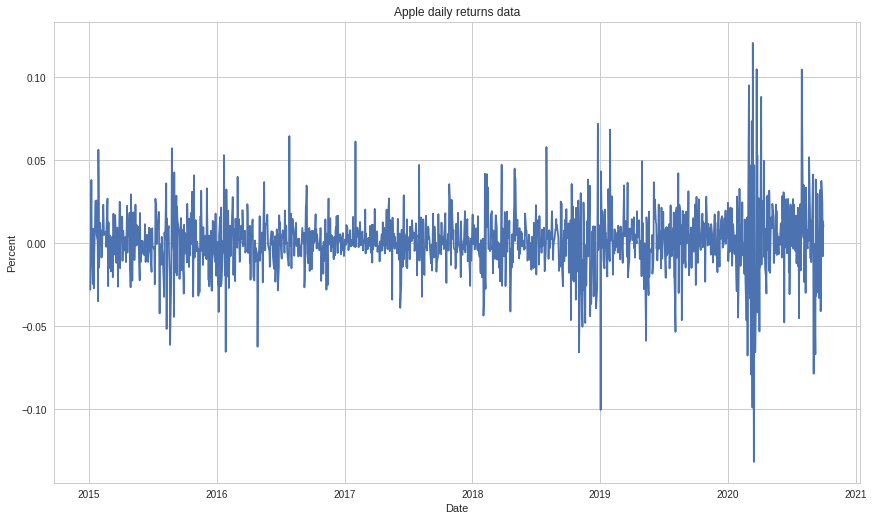

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
plt.show()

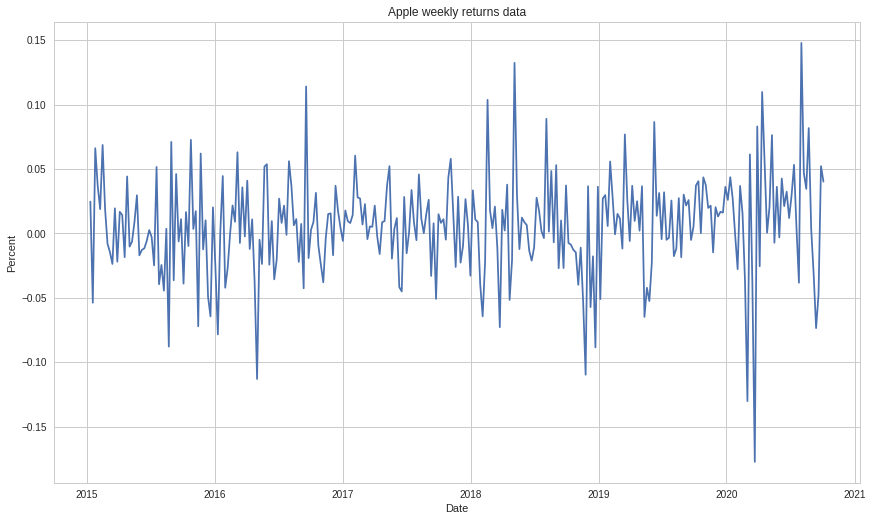

In [15]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(weekly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple weekly returns data")
plt.show()

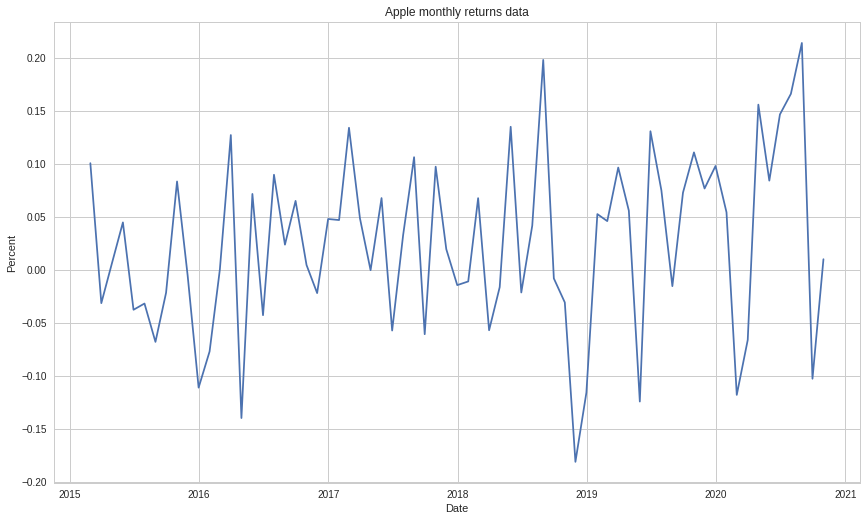

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple monthly returns data")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fbfb035c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc3177e48>], dtype=object)

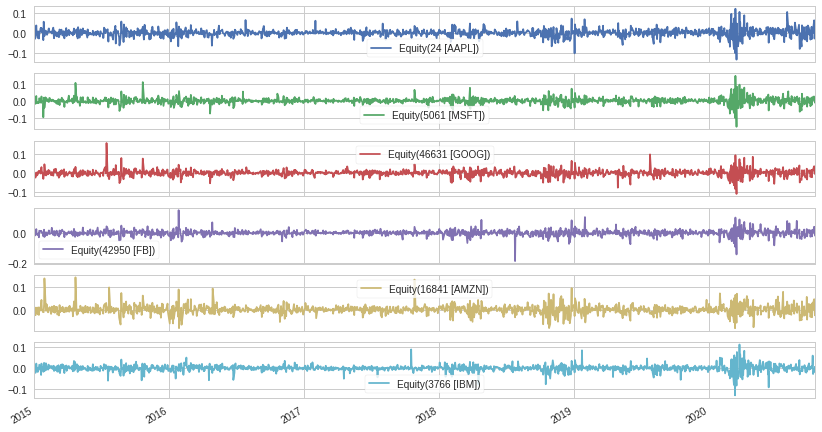

In [17]:
from quantopian.research import returns, symbols

r = returns(
    assets=symbols(['AAPL',"MSFT","GOOG","FB","AMZN","IBM"]),
    start='2015-01-01',
    end='2020-10-15',
)
r.plot(subplots=True)

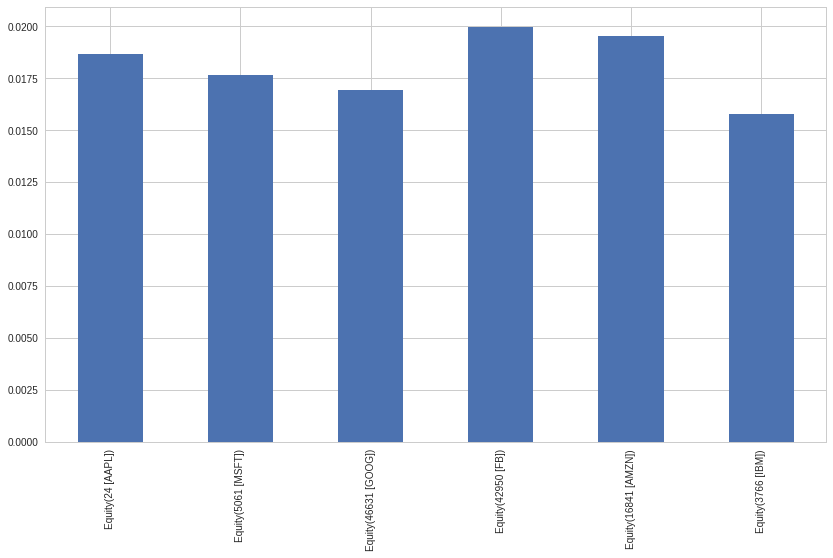

In [18]:
s = np.std(r)
s.plot(kind = 'bar')

#### Multilinear Regression

We carry out basic linear regression with multiple variables. The 'Price' variable is our desired output with 'Open','High','Low' and 'Volume' as the predictors. 

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,Y_train)

/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm_predictions = lm.predict(X_test)

#### Decision Tree Regressor

A decision tree will be created for the given training data. i.e stock values from 2015 to 2020

The price values in the subset on leaf node will be average and given as prediction for the similar conditions. 

For continuous data as features,different range for each feature will be taken as dividing values.

In [22]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=4)

In [23]:
decision_tree_regressor.fit(X_train, Y_train)

/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [24]:
dt_predictions = decision_tree_regressor.predict(X_test)

#### Random Forest Regression

A random N trees will be trained on different dataset of training data using Bootstrap Aggregation. 
Bootstrap is a technique on sampling with replacement. 

The output of all the prediction values of N trees will be taken and averaged. The average value will be given as final Target Prediction.

In [25]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_features=2,max_depth=4)

In [26]:
random_forest_regressor.fit(X_train, Y_train)

/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [27]:
rf_predictions = random_forest_regressor.predict(X_test)

#### Support Vector Machines Regressor

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression.
The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample.
Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

In [28]:
X_scalar = StandardScaler()
X_scalar.fit(X_train)
Y_scalar = StandardScaler()
Y_scalar.fit(Y_train)
X_train_sc = X_scalar.transform(X_train)
Y_train_sc = Y_scalar.transform(Y_train)
X_test_sc = X_scalar.transform(X_test)

In [29]:
svm_reg = SVR()

In [30]:
svm_reg.fit(X_train_sc,Y_train_sc)

/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
svr_predictions = svm_reg.predict(X_test_sc)

In [32]:
svr_predictions = Y_scalar.inverse_transform(svr_predictions)


#### ARIMA

AutoRegressive Integrated Moving Average (ARIMA). Its a time series Regression model which uses previous price values and moving averages as features. ARIMA has 3 paramters (p,d,q) :

p : Number of Previous data to take

d : Number of times the raw observations has to be differenced

q : Size of the moving average

(5,1,0) represents taking 5 lag values, one time differencing the raw observation and 0 moving average.

In [33]:
X_train_TS , Y_test_TS = df_train.iloc[:,-1], df_test.iloc[:, -1]

In [34]:
history = [x for x in X_train_TS]
predictions = list()
for t in range(len(Y_test_TS)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = Y_test_TS[t]
    history.append(obs)

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [35]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#### Mean Square Error on Test Data

Finding the Mean Square error between True Y values and Prediction values for all the Regression Models

MSE = (Y_true - Y_pred)^2 / N

In [36]:
lm_mse = mean_squared_error(Y_test, lm_predictions)
dt_mse = mean_squared_error(Y_test, dt_predictions)
rt_mse = mean_squared_error(Y_test, rf_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
arima_mse = mean_squared_error(Y_test_TS, predictions)

In [40]:
print("The MSE Testing error :\nLinear Regression : {}\nDecision Tree : {}\nRandom Forest Regression : {}\nSVR : {}\nARIMA : {}".format(lm_mse, dt_mse, rt_mse, svr_mse, arima_mse))

The MSE Testing error :
Linear Regression : 0.6702891463404744
Decision Tree : 962.6714549902437
Random Forest Regression : 962.0905136636383
SVR : 1977.0865046545246
ARIMA : 4.86236193898992


In [38]:
lm_rmse = math.sqrt(mean_squared_error(Y_test, lm_predictions))
dt_rmse = math.sqrt(mean_squared_error(Y_test, dt_predictions))
rt_rmse = math.sqrt(mean_squared_error(Y_test, rf_predictions))
svr_rmse = math.sqrt(mean_squared_error(Y_test, svr_predictions))
arima_rmse = math.sqrt(mean_squared_error(Y_test_TS, predictions))

In [41]:
print("The RMSE Testing error :\nLinear Regression : {}\nDecision Tree : {}\nRandom Forest Regression : {}\nSVR : {}\nARIMA : {}".format(lm_rmse, dt_rmse, rt_rmse, svr_rmse, arima_rmse))

The RMSE Testing error :
Linear Regression : 0.8187118823740587
Decision Tree : 31.026947239299
Random Forest Regression : 31.0175839430417
SVR : 44.46444090117995
ARIMA : 2.2050764020754294


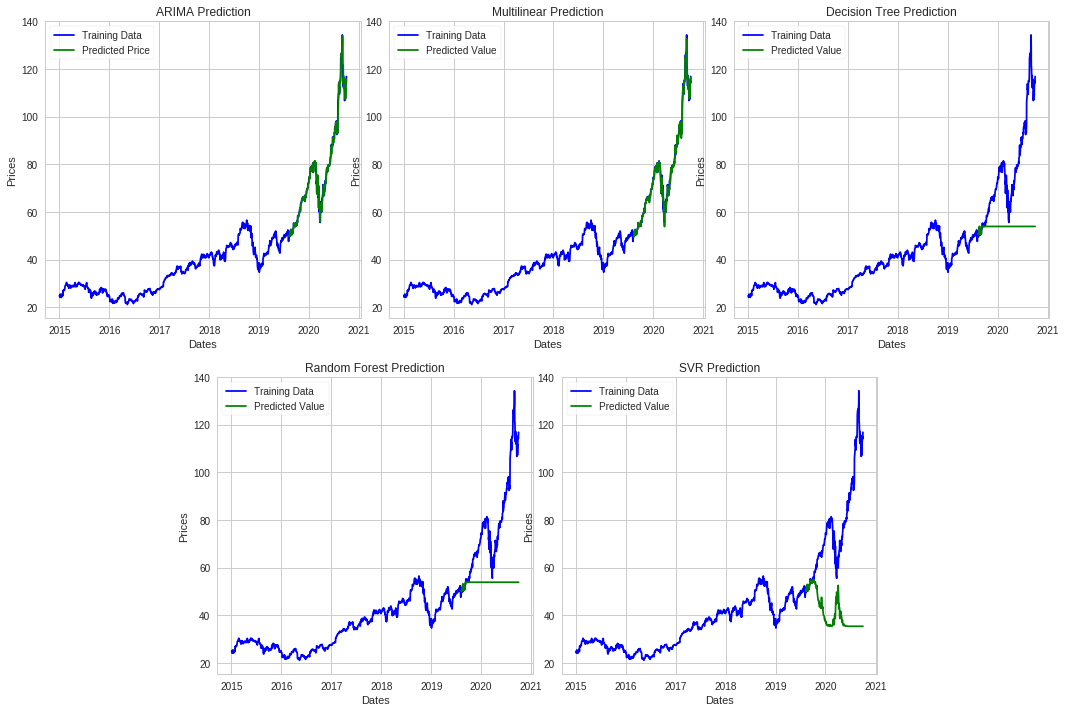

In [39]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax1.plot(pd.concat([X_train_TS, Y_test_TS]), 'green', color='blue', label='Training Data')
ax1.plot(Y_test_TS.index, predictions, color='green', label='Predicted Price')
ax1.set_title('ARIMA Prediction')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Prices')
ax1.legend()
ax2.plot(df['price'], 'green', color='blue', label='Training Data')
ax2.plot(df_test.index, lm_predictions, 'green', label = 'Predicted Value')
ax2.set_title('Multilinear Prediction')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Prices')
ax2.legend()
ax3.plot(df['price'], 'green', color='blue', label='Training Data')
ax3.plot(df_test.index, dt_predictions, 'green', label = 'Predicted Value')
ax3.set_title('Decision Tree Prediction')
ax3.set_xlabel('Dates')
ax3.set_ylabel('Prices')
ax3.legend()
ax4.plot(df['price'], 'green', color='blue', label='Training Data')
ax4.plot(df_test.index, rf_predictions, 'green', label = 'Predicted Value')
ax4.set_title('Random Forest Prediction')
ax4.set_xlabel('Dates')
ax4.set_ylabel('Prices')
ax4.legend()
ax5.plot(df['price'], 'green', color='blue', label='Training Data')
ax5.plot(df_test.index, svr_predictions, 'green', label = 'Predicted Value')
ax5.set_title('SVR Prediction')
ax5.set_xlabel('Dates')
ax5.set_ylabel('Prices')
ax5.legend()